In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
df=pd.read_csv('Mall_Customers.csv')


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [62]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [64]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [65]:
del df['CustomerID']

In [133]:
print("Mean of Annual Income (k$) of Female:",df['Annual Income (k$)'].loc[df['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",df['Annual Income (k$)'].loc[df['Gender'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


In [134]:
print("Mean of Spending Score (1-100) of Female:",df['Spending Score (1-100)'].loc[df['Gender'] == 'Female'].mean())
print("Mean of Spending Score (1-100) of Male:",df['Spending Score (1-100)'].loc[df['Gender'] == 'Male'].mean())

Mean of Spending Score (1-100) of Female: 51.526785714285715
Mean of Spending Score (1-100) of Male: 48.51136363636363


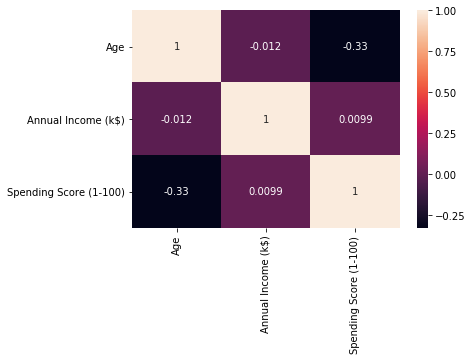

In [66]:
df.corr()
sns.heatmap(df.corr(), annot=True)
plt.show()

In [67]:
df.query('Gender == "Male"').Gender.count()

88

In [68]:
df.query('Gender == "Female"').Gender.count()

112

[]

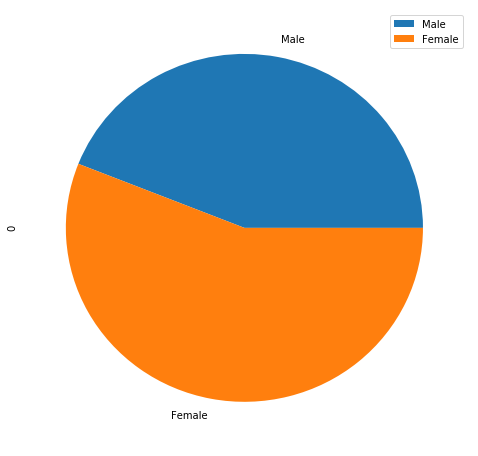

In [69]:
data = pd.DataFrame([df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()], index=['Male', 'Female'])
data.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.plot()

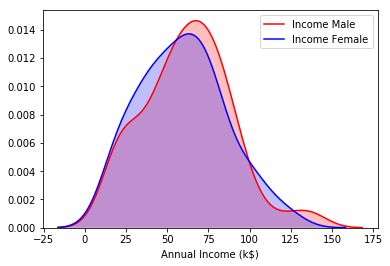

In [101]:
p1=sns.kdeplot(df['Annual Income (k$)'].loc[df['Gender'] == 'Male'],label='Income Male', shade=True, color="r")
p1=sns.kdeplot(df['Annual Income (k$)'].loc[df['Gender'] == 'Female'],label='Income Female', shade=True, color="b")
plt.xlabel('Annual Income (k$)')
plt.show()

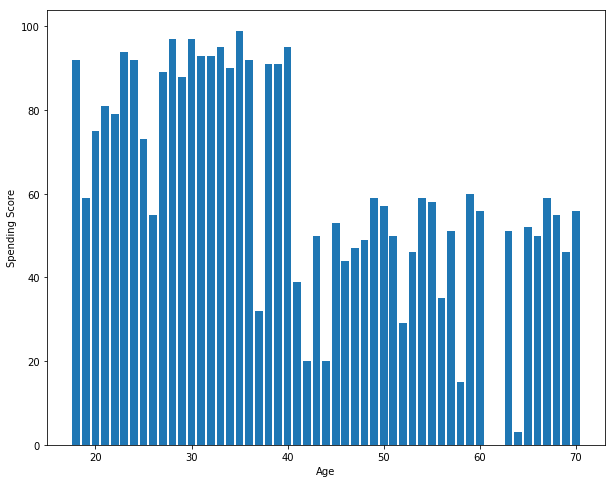

In [116]:
df.sort_values(['Age'])
plt.figure(figsize=(10,8))
plt.bar( df['Age'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

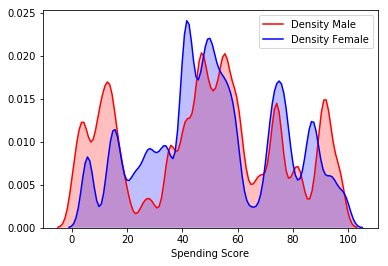

In [125]:
p1=sns.kdeplot(df['Spending Score (1-100)'].loc[df['Gender'] == 'Male'],label='Density Male',bw=2, shade=True, color="r")
p1=sns.kdeplot(df['Spending Score (1-100)'].loc[df['Gender'] == 'Female'],label='Density Female',bw=2, shade=True, color="b")
plt.xlabel('Spending Score')
plt.show()

In [136]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

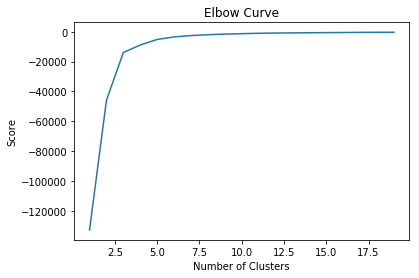

In [161]:
Y = df[['Spending Score (1-100)']].values
X = df[['Annual Income (k$)']].values
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

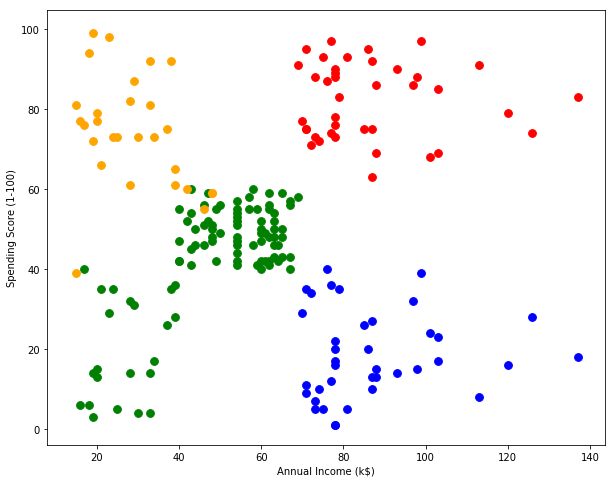

In [178]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df.iloc[:,2:])

df["label"] = clusters
 
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter( df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter( df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.show()